In [136]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt

lg = bs.login()

login success!


In [137]:
# 获取MA60数据
def get_ma_data(stock, start_date, end_date):
  data_array = []
  res = bs.query_history_k_data_plus(
    stock,
    "date,code,close",
    start_date=start_date,
    end_date=end_date,
    frequency="d",
    adjustflag="3",
  )
  while (res.error_code == '0') & res.next():
    data_array.append(res.get_row_data())
  result = pd.DataFrame(data_array, columns=res.fields)
  result['MA60'] = result['close'].rolling(window=60).mean()
  dropedResult = result.dropna(subset=['close', 'MA60'])
  dropedResult['deviate_rate'] = dropedResult['close'].astype(float) / dropedResult['MA60'].astype(float) - 1
  print('dropedResult -->', dropedResult)
  maxRate = dropedResult['deviate_rate'].astype(float).max()
  minRate = dropedResult['deviate_rate'].astype(float).min()
  latestRate = dropedResult['deviate_rate'].astype(float).iloc[-1]
  print('max rate is', maxRate * 100, '%')
  print('min rate is', minRate * 100, '%')
  print('latest rate is', latestRate * 100, '%')
  return dropedResult


dropedResult -->             date       code      close         MA60  deviate_rate
59    2014-04-02  sh.000015  1638.7960  1626.882950      0.007323
60    2014-04-03  sh.000015  1620.2970  1625.974917     -0.003492
61    2014-04-04  sh.000015  1630.3330  1625.655317      0.002877
62    2014-04-08  sh.000015  1661.9260  1626.460633      0.021805
63    2014-04-09  sh.000015  1668.4260  1627.303800      0.025270
...          ...        ...        ...          ...           ...
2619  2024-10-14  sh.000015  3156.1894  2930.360957      0.077065
2620  2024-10-15  sh.000015  3084.5561  2931.279953      0.052290
2621  2024-10-16  sh.000015  3126.8751  2932.263918      0.066369
2622  2024-10-17  sh.000015  3076.1885  2932.722955      0.048919
2623  2024-10-18  sh.000015  3097.1725  2933.855227      0.055666

[2565 rows x 5 columns]
max rate is 28.040467277065993 %
min rate is -29.636450512292534 %
latest rate is 5.566643911018243 %


/Users/chenhao/Downloads/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


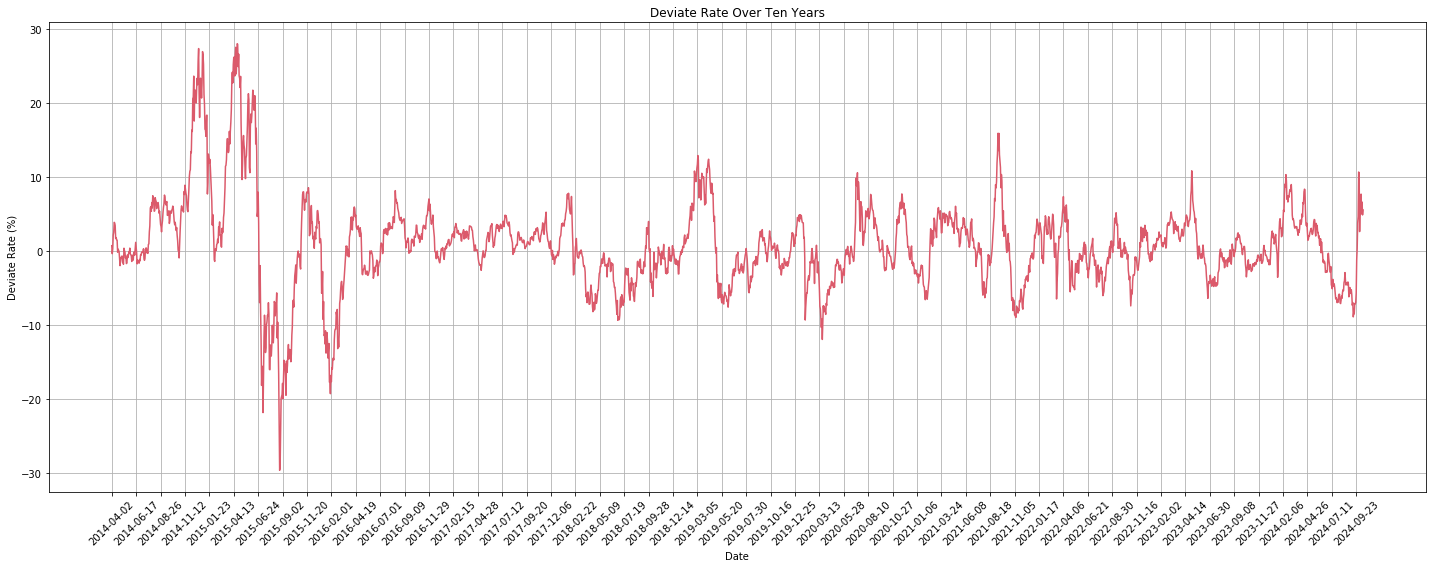

In [138]:
# 绘制
def draw_plot():
  result = get_ma_data('sh.000015', '2014-01-01', '2024-10-20')
  result['deviate_rate'] = result['deviate_rate'] * 100
  interval = 50
  x_labels = result['date'].astype(str)
  x_labels_sampled = x_labels[::interval]
  # 绘制折线图
  plt.figure(figsize=(20, 8))  # 设置图形的大小
  plt.plot(result['date'], result['deviate_rate'], linestyle='-', color='#db5a6b')  # 绘制折线图
  plt.title('Deviate Rate Over Ten Years')  # 设置图形的标题
  plt.xlabel('Date')  # 设置x轴的标签
  plt.ylabel('Deviate Rate (%)')  # 设置y轴的标签
  plt.grid(True)  # 显示网格
  plt.xticks(result['date'][::interval], x_labels_sampled, rotation=45)
  plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
  plt.show()  # 显示图形

draw_plot()

/Users/chenhao/Downloads/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dropedResult -->            date       code      close         MA60  deviate_rate
59   2023-10-31  sh.000015  2822.9034  2882.797732     -0.020776
60   2023-11-01  sh.000015  2819.4199  2880.499005     -0.021204
61   2023-11-02  sh.000015  2826.7227  2878.940282     -0.018138
62   2023-11-03  sh.000015  2809.7314  2876.888820     -0.023344
63   2023-11-06  sh.000015  2795.6926  2874.763242     -0.027505
..          ...        ...        ...          ...           ...
288  2024-10-14  sh.000015  3156.1894  2930.360957      0.077065
289  2024-10-15  sh.000015  3084.5561  2931.279953      0.052290
290  2024-10-16  sh.000015  3126.8751  2932.263918      0.066369
291  2024-10-17  sh.000015  3076.1885  2932.722955      0.048919
292  2024-10-18  sh.000015  3097.1725  2933.855227      0.055666

[234 rows x 5 columns]
max rate is 10.690784630697102 %
min rate is -8.891606291032328 %
latest rate is 5.56664391101831 %


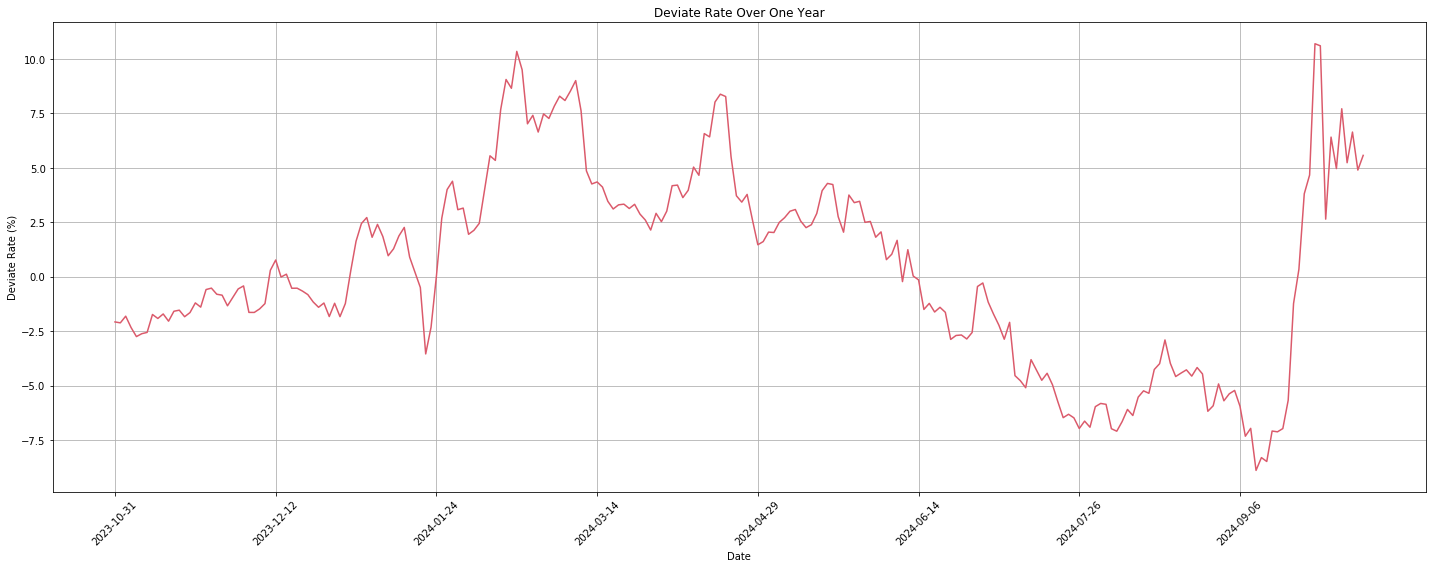

In [139]:
# 绘制
def draw_recent_plot():
  result = get_ma_data('sh.000015', '2023-08-01', '2024-10-20')
  result['deviate_rate'] = result['deviate_rate'] * 100
  interval = 30
  x_labels = result['date'].astype(str)
  x_labels_sampled = x_labels[::interval]
  # 绘制折线图
  plt.figure(figsize=(20, 8))  # 设置图形的大小
  plt.plot(result['date'], result['deviate_rate'], linestyle='-', color='#db5a6b')  # 绘制折线图
  plt.title('Deviate Rate Over One Year')  # 设置图形的标题
  plt.xlabel('Date')  # 设置x轴的标签
  plt.ylabel('Deviate Rate (%)')  # 设置y轴的标签
  plt.grid(True)  # 显示网格
  plt.xticks(result['date'][::interval], x_labels_sampled, rotation=45)
  plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
  plt.show()  # 显示图形

draw_recent_plot()